In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
file = r'data.csv'
data = pd.read_csv(file, sep=';', encoding='utf-16', decimal=",")

# Preview the data

In [3]:
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,Hospital readmission,M,61.3,No car,68.7,0
1,Hospital readmission,M,85.8,Car,86.3,0
2,Hospital readmission,F,65.0,No car,46.2,1
3,Hospital readmission,F,72.5,No car,39.7,0
4,Hospital readmission,M,93.0,No car,73.3,0


Average age= 65.9158


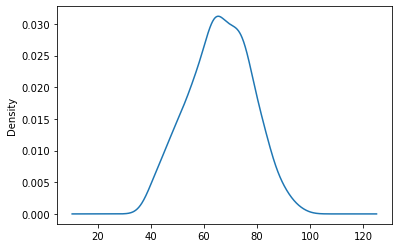

In [6]:
ax  = data['Age'].plot.kde()
print("Average age= " + str(data['Age'].mean()))

# Processing the dataset

1. We remove the Reason column

In [63]:
data = data.drop('Reason', axis=1)
data.head()

,Gender,Age,Mobility,Distance,Participation
0,M,61.3,No car,68.7,0
1,M,85.8,Car,86.3,0
2,F,65.0,No car,46.2,1
3,F,72.5,No car,39.7,0
4,M,93.0,No car,73.3,0


2. Transform the gender and mobility to boolean values

In [64]:
data.replace('M', 1, inplace=True)
data.replace('F', 0, inplace=True)
data.replace('No car', 0, inplace=True)
data.replace('Car', 1, inplace=True)
data.head()

,Gender,Age,Mobility,Distance,Participation
0,1,61.3,0,68.7,0
1,1,85.8,1,86.3,0
2,0,65.0,0,46.2,1
3,0,72.5,0,39.7,0
4,1,93.0,0,73.3,0


3. Split into X(input) and Y(output)

In [65]:
y = data.iloc[:,4]
data = data.drop('Participation', axis=1)
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Participation, dtype: int64

In [66]:
X = data.iloc[:, :]
X.head()

,Gender,Age,Mobility,Distance
0,1,61.3,0,68.7
1,1,85.8,1,86.3
2,0,65.0,0,46.2
3,0,72.5,0,39.7
4,1,93.0,0,73.3


4. Split the data into train and test data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the model and predicting an output

In [24]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7866666666666666
Precision: 0.7878787878787878
Recall: 0.7428571428571429
